<a href="https://colab.research.google.com/github/ajinkyatalekar/TensorFlow/blob/main/HandwrittenDigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
# Splitting Dataset
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Pre processing 
X_train = X_train / 255.0
X_test = X_test / 255.0

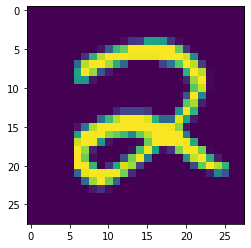

2


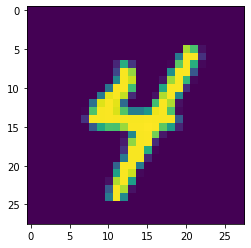

4


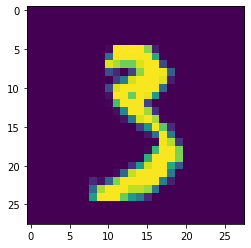

3


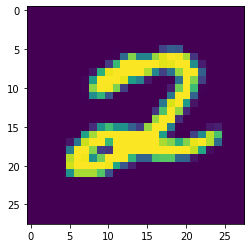

2


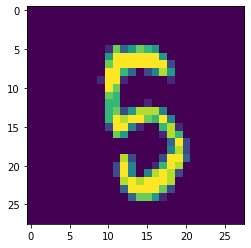

5


<BarContainer object of 10 artists>

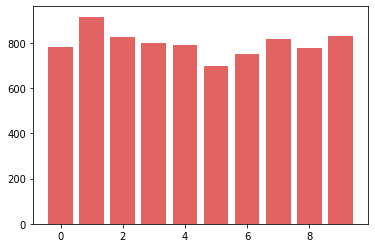

In [4]:
# Visualizing the data
import matplotlib.pyplot as plt

for i in range(5):
    plt.imshow(X_train[i])
    plt.show()
    print(Y_train[i])
    
import numpy as np
uq, co = np.unique(Y_train, return_counts=True)
plt.bar(uq, co, color=plt.get_cmap('plasma')(0.6))

In [5]:
# Building CNN Model
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']


In [6]:
model.compile(loss=loss, optimizer=optim, metrics=metrics)

model.fit(X_train, Y_train, epochs=10, shuffle=True, verbose=2)

prob_model = keras.models.Sequential([
    model,
    keras.layers.Softmax()
])

model.evaluate(X_test, Y_test, verbose=2)

Epoch 1/10
250/250 - 1s - loss: 0.5573 - accuracy: 0.8415 - 1s/epoch - 6ms/step
Epoch 2/10
250/250 - 1s - loss: 0.2489 - accuracy: 0.9293 - 641ms/epoch - 3ms/step
Epoch 3/10
250/250 - 1s - loss: 0.1783 - accuracy: 0.9489 - 609ms/epoch - 2ms/step
Epoch 4/10
250/250 - 1s - loss: 0.1336 - accuracy: 0.9622 - 596ms/epoch - 2ms/step
Epoch 5/10
250/250 - 1s - loss: 0.1015 - accuracy: 0.9735 - 597ms/epoch - 2ms/step
Epoch 6/10
250/250 - 1s - loss: 0.0791 - accuracy: 0.9786 - 607ms/epoch - 2ms/step
Epoch 7/10
250/250 - 1s - loss: 0.0595 - accuracy: 0.9862 - 628ms/epoch - 3ms/step
Epoch 8/10
250/250 - 1s - loss: 0.0477 - accuracy: 0.9887 - 621ms/epoch - 2ms/step
Epoch 9/10
250/250 - 1s - loss: 0.0359 - accuracy: 0.9923 - 629ms/epoch - 3ms/step
Epoch 10/10
250/250 - 1s - loss: 0.0266 - accuracy: 0.9964 - 627ms/epoch - 3ms/step
63/63 - 0s - loss: 0.1653 - accuracy: 0.9535 - 442ms/epoch - 7ms/step


[0.16532091796398163, 0.953499972820282]

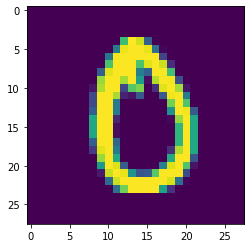

Predicted: 0 Actual: 0


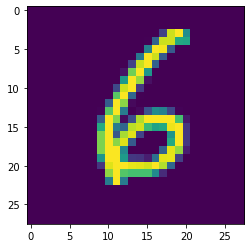

Predicted: 6 Actual: 6


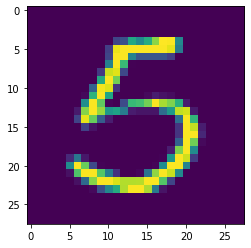

Predicted: 5 Actual: 5


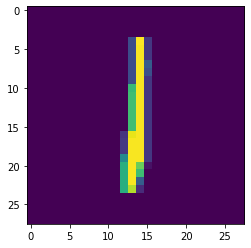

Predicted: 1 Actual: 1


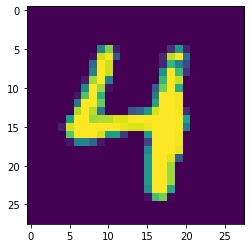

Predicted: 4 Actual: 4


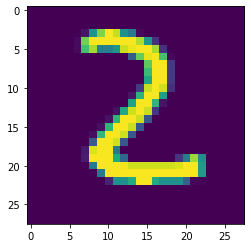

Predicted: 2 Actual: 2


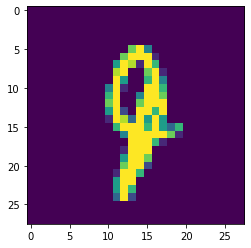

Predicted: 7 Actual: 9


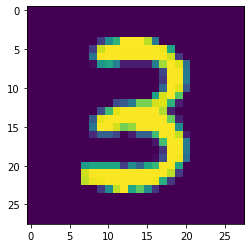

Predicted: 3 Actual: 3


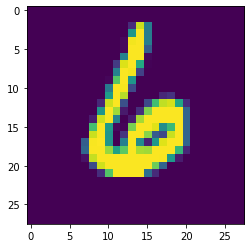

Predicted: 6 Actual: 6


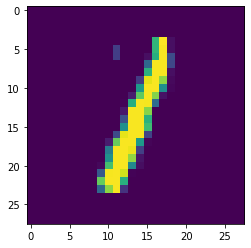

Predicted: 1 Actual: 1


In [7]:
# Predicting values with the model
y_pred = prob_model(X_test)
y_pred = np.argmax(y_pred, axis=1)

for i in range(10):
    plt.imshow(X_test[i])
    plt.show()
    print('Predicted:', y_pred[i], 'Actual:', Y_test[i])